In [1]:
import numpy as np
import pandas as pd
import time

import keras
from keras import Model, backend as K

Using TensorFlow backend.
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/a80099707/anaconda3/lib/python3.6/sit

In [16]:
R = np.array([
    [1, 0, 0, 1, 3, 0, 4, 4, 1],
    [2, 0, 3, 1, 1, 1, 5, 4, 0],
    [1, 2, 0, 5, 0, 4, 0, 0, 1],
    [1, 0, 0, 4, 4, 0, 3, 1, 0],
    [2, 1, 5, 4, 0, 1, 3, 0, 0],
    [5, 1, 5, 4, 0, 1, 3, 0, 1],
    [0, 0, 0, 1, 0, 1, 3, 0, 2],
    [3, 0, 0, 2, 0, 1, 2, 0, 1],
    [2, 1, 3, 0, 1, 3, 1, 0, 0],
    [2, 2, 5, 4, 4, 0, 0, 1, 0]
])

## keras MF: sustainability & reproducibility test

In [62]:
n_users, n_items = R.shape
num_predictive_factors = 4
user_input = keras.layers.Input(shape=[1], name='User')
item_input = keras.layers.Input(shape=[1], name='Item')

user_embedding_mf = keras.layers.Embedding(n_users, num_predictive_factors, )(user_input)
user_vec_mf = keras.layers.Flatten(name='Flatten_users_MF')(user_embedding_mf)
#user_vec_mf = keras.layers.Dropout(0.3)(user_vec_mf)
item_embedding_mf = keras.layers.Embedding(n_items, num_predictive_factors, )(item_input)
item_vec_mf = keras.layers.Flatten(name='Flatten_items_MF')(item_embedding_mf)
#item_vec_mf = keras.layers.Dropout(0.3)(item_vec_mf)

pred_mf = keras.layers.dot([user_vec_mf, item_vec_mf], axes=1)
model = Model(inputs=[user_input, item_input], output=pred_mf)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', 'accuracy'])

# Train Model
history = model.fit(x=[pd.Series(np.nonzero(R)[0]), pd.Series(np.nonzero(R)[1])], y=R[np.nonzero(R)],
                   batch_size=None,
                   epochs=10000,
                   verbose=0)

/Users/a80099707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("do...)`
  


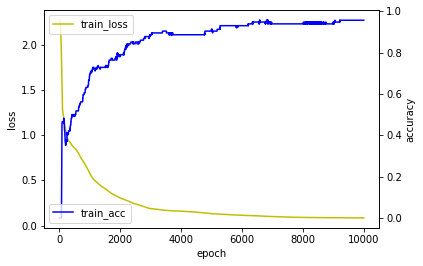

In [63]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train_loss')
acc_ax.plot(history.history['acc'], 'b', label='train_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [64]:
prd_user = [[idx]*n_items for idx in range(n_users)]
prd_user = pd.Series(np.reshape(prd_user, -1))
prd_item = pd.Series([x for x in range(n_items)] * n_users)

ret = model.predict(x=[prd_user, prd_item])

pred_R = np.round(ret.reshape([n_users, n_items]))
pred_R.astype('int')

array([[ 1,  3,  5,  1,  3,  1,  4,  4,  1,  5,  1,  2,  3],
       [ 2,  4,  3,  1,  1,  1,  3,  4,  2,  4,  3,  1,  2],
       [ 1,  2, -1,  5, -5,  4, -2, -1,  1,  5,  9,  1,  0],
       [ 1,  1,  5,  4,  4,  2,  3,  1,  0,  6,  1,  3,  1],
       [ 2,  1,  5,  4,  5,  1,  3,  1,  0,  4, -1,  2,  1],
       [ 5,  1,  5,  4,  7,  1,  3,  0,  1,  1, -2,  1, -1],
       [ 3,  3,  3,  1,  2,  1,  3,  3,  2,  3,  2,  1,  2],
       [ 2,  2,  3,  2,  3,  1,  2,  2,  1,  3,  1,  1,  1],
       [ 2,  1,  3,  6,  1,  3,  1, -1,  0,  5,  4,  2,  0],
       [ 2,  2,  5,  4,  4,  2,  3,  1,  0,  5,  1,  2,  1],
       [ 0,  3,  1,  5, -4,  4,  0,  1,  1,  7,  9,  2,  1],
       [ 5,  4,  3,  1,  3,  1,  3,  4,  3,  1,  1,  0,  1],
       [ 5,  4,  0, -2,  1,  0,  2,  4,  4, -3,  1, -3,  0],
       [ 1,  3,  5,  1,  3,  1,  4,  4,  1,  5,  1,  2,  3],
       [ 4,  4,  3,  3,  1,  3,  2,  3,  2,  4,  5,  1,  1]])

In [65]:
R

array([[1, 0, 0, 1, 3, 0, 4, 4, 1, 0, 1, 2, 3],
       [2, 0, 3, 1, 1, 1, 5, 4, 0, 0, 3, 1, 0],
       [1, 2, 0, 5, 0, 4, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 4, 4, 0, 3, 1, 0, 0, 1, 3, 1],
       [2, 1, 5, 4, 0, 1, 3, 0, 0, 4, 0, 0, 1],
       [5, 1, 5, 4, 0, 1, 3, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 3, 0, 2, 3, 2, 1, 1],
       [3, 0, 0, 2, 0, 1, 2, 0, 1, 3, 1, 1, 1],
       [2, 1, 3, 0, 1, 3, 1, 0, 0, 5, 4, 0, 0],
       [2, 2, 5, 4, 4, 0, 0, 1, 0, 0, 1, 3, 1],
       [0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 2, 1],
       [5, 4, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0, 1],
       [0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0],
       [1, 3, 0, 1, 3, 1, 0, 4, 1, 0, 1, 2, 3],
       [4, 4, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 1]])

In [66]:
# Reproducibility (k=4)
1 - len(np.nonzero(R[np.nonzero(R)] - pred_R[np.nonzero(R)])[0]) / len(np.nonzero(R)[0])

0.956140350877193

In [43]:
R = np.array([
    [1, 0, 0, 1, 3, 0, 4, 4, 1, 0, 1, 2, 3],
    [2, 0, 3, 1, 1, 1, 5, 4, 0, 0, 3, 1, 0],
    [1, 2, 0, 5, 0, 4, 0, 0, 1, 0, 0, 1, 0],
    [1, 0, 0, 4, 4, 0, 3, 1, 0, 0, 1, 3, 1],
    [2, 1, 5, 4, 0, 1, 3, 0, 0, 4, 0, 0, 1],
    [5, 1, 5, 4, 0, 1, 3, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 3, 0, 2, 3, 2, 1, 1],
    [3, 0, 0, 2, 0, 1, 2, 0, 1, 3, 1, 1, 1],
    [2, 1, 3, 0, 1, 3, 1, 0, 0, 5, 4, 0, 0],
    [2, 2, 5, 4, 4, 0, 0, 1, 0, 0, 1, 3, 1],
    [0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 2, 1],
    [5, 4, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0, 1],
    [0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0],
    [1, 3, 0, 1, 3, 1, 0, 4, 1, 0, 1, 2, 3],
    [4, 4, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 1]
])
R.shape

(15, 13)

In [57]:
n_users, n_items = R.shape
num_predictive_factors = 4
user_input = keras.layers.Input(shape=[1], name='User')
item_input = keras.layers.Input(shape=[1], name='Item')

user_embedding_mf = keras.layers.Embedding(n_users, num_predictive_factors, )(user_input)
user_vec_mf = keras.layers.Flatten(name='Flatten_users_MF')(user_embedding_mf)
#user_vec_mf = keras.layers.Dropout(0.3)(user_vec_mf)
item_embedding_mf = keras.layers.Embedding(n_items, num_predictive_factors, )(item_input)
item_vec_mf = keras.layers.Flatten(name='Flatten_items_MF')(item_embedding_mf)
#item_vec_mf = keras.layers.Dropout(0.3)(item_vec_mf)

pred_mf = keras.layers.dot([user_vec_mf, item_vec_mf], axes=1)
model = Model(inputs=[user_input, item_input], output=pred_mf)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', 'accuracy'])

# Train Model
history = model.fit(x=[pd.Series(np.nonzero(R)[0]), pd.Series(np.nonzero(R)[1])], y=R[np.nonzero(R)],
                   batch_size=None,
                   epochs=10000,
                   verbose=0)

/Users/a80099707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("do...)`
  


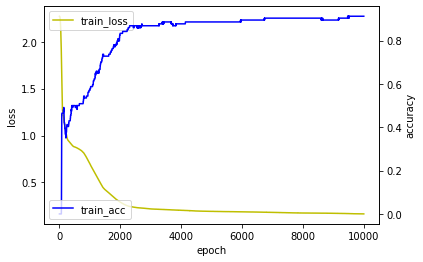

In [58]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train_loss')
acc_ax.plot(history.history['acc'], 'b', label='train_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [59]:
prd_user = [[idx]*n_items for idx in range(n_users)]
prd_user = pd.Series(np.reshape(prd_user, -1))
prd_item = pd.Series([x for x in range(n_items)] * n_users)

ret = model.predict(x=[prd_user, prd_item])

pred_R = np.round(ret.reshape([n_users, n_items]))
pred_R.astype('int')

array([[ 1,  3,  3,  1,  3,  1,  4,  4,  1,  9,  1,  2,  3],
       [ 3,  6,  3,  1,  1,  2,  4,  4,  2,  9,  3,  1,  3],
       [ 1,  2, 11,  5,  9,  4,  7, 12,  1, 26,  6,  1,  7],
       [ 1,  0,  5,  4,  4,  0,  3,  1,  1,  3,  1,  2,  1],
       [ 2,  1,  5,  4,  3,  1,  3,  2,  1,  4,  3,  1,  1],
       [ 2,  1,  5,  4,  3,  1,  3,  2,  1,  4,  3,  1,  1],
       [ 3,  5,  2,  1,  0,  1,  3,  1,  2,  3,  2,  1,  1],
       [ 2,  2,  3,  2,  2,  1,  2,  1,  1,  3,  1,  1,  1],
       [ 2,  1,  3,  2,  1,  2,  1,  3,  1,  5,  4, -2,  1],
       [ 2,  2,  5,  4,  4,  0,  4,  1,  2,  3,  1,  3,  1],
       [ 1,  3,  1,  0,  1,  0,  2,  1,  1,  2,  0,  2,  1],
       [ 5,  4,  6,  6,  3,  1,  5,  0,  3,  1,  3,  2,  0],
       [ 1,  4,  1, -1,  1,  1,  3,  4,  1,  9,  1,  1,  3],
       [ 1,  3,  3,  1,  3,  1,  4,  4,  1,  9,  1,  2,  3],
       [ 4,  4,  4,  3,  1,  2,  3,  2,  2,  4,  4,  0,  1]])

In [60]:
R

array([[1, 0, 0, 1, 3, 0, 4, 4, 1, 0, 1, 2, 3],
       [2, 0, 3, 1, 1, 1, 5, 4, 0, 0, 3, 1, 0],
       [1, 2, 0, 5, 0, 4, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 4, 4, 0, 3, 1, 0, 0, 1, 3, 1],
       [2, 1, 5, 4, 0, 1, 3, 0, 0, 4, 0, 0, 1],
       [5, 1, 5, 4, 0, 1, 3, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 3, 0, 2, 3, 2, 1, 1],
       [3, 0, 0, 2, 0, 1, 2, 0, 1, 3, 1, 1, 1],
       [2, 1, 3, 0, 1, 3, 1, 0, 0, 5, 4, 0, 0],
       [2, 2, 5, 4, 4, 0, 0, 1, 0, 0, 1, 3, 1],
       [0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 2, 1],
       [5, 4, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0, 1],
       [0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0],
       [1, 3, 0, 1, 3, 1, 0, 4, 1, 0, 1, 2, 3],
       [4, 4, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 1]])

In [61]:
# Reproducibility (k=3)
1 - len(np.nonzero(R[np.nonzero(R)] - pred_R[np.nonzero(R)])[0]) / len(np.nonzero(R)[0])

0.9122807017543859